In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
df = pd.read_csv("bank-full.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [6]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target
['no' 'yes']


In [7]:
df.apply(lambda x: sum(x.isnull()))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
df = df[df['job'] != 'unknown']
df = df[df['contact'] != 'unknown']
df = df[df['education'] != 'unknown']
df = df[df['pdays'] > -1]

for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
df.describe().transpose()

job
['admin.' 'services' 'management' 'blue-collar' 'technician' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular']
month
['oct' 'nov' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'dec']
poutcome
['failure' 'other' 'success' 'unknown']
Target
['no' 'yes']


,count,mean,std,min,25%,50%,75%,max
age,7847.0,40.782465,11.283667,18.0,32.0,38.0,47.0,89.0
balance,7847.0,1551.879827,3083.790348,-1884.0,162.0,593.0,1733.5,81204.0
day,7847.0,14.262138,7.885894,1.0,7.0,14.0,20.0,31.0
duration,7847.0,261.345865,236.271037,5.0,113.0,194.0,324.0,2219.0
campaign,7847.0,2.064483,1.565926,1.0,1.0,2.0,2.0,16.0
pdays,7847.0,223.288773,111.879958,1.0,133.0,195.0,326.0,871.0
previous,7847.0,3.184402,4.613070,1.0,1.0,2.0,4.0,275.0


In [9]:
df['Target'].value_counts()

no     6059
yes    1788
Name: Target, dtype: int64

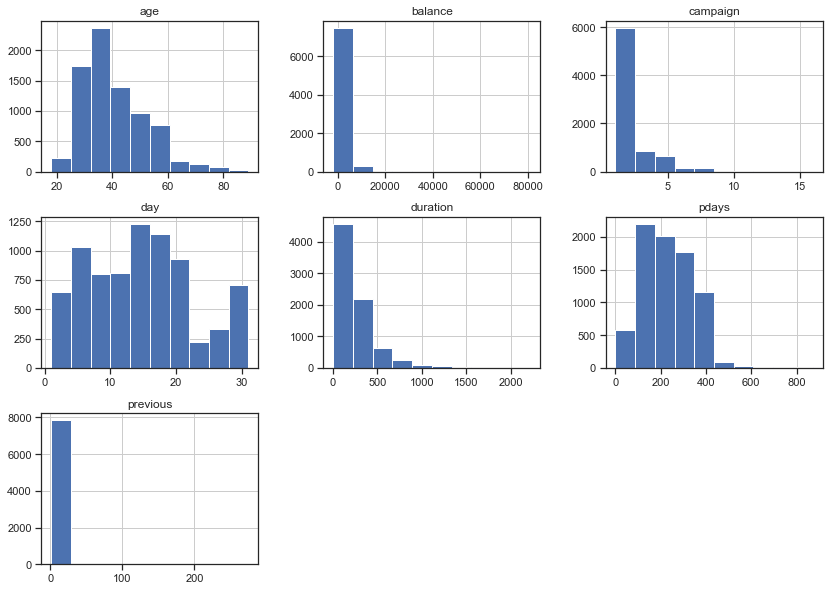

In [10]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt

df.hist(figsize=(14,10))
plt.show()

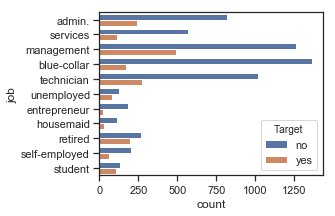

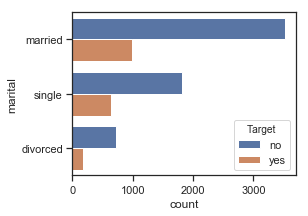

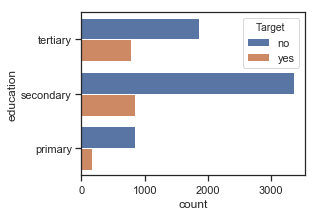

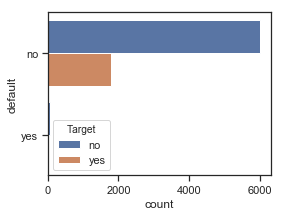

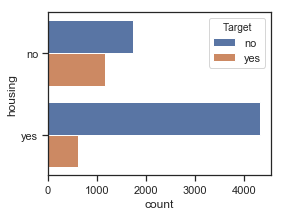

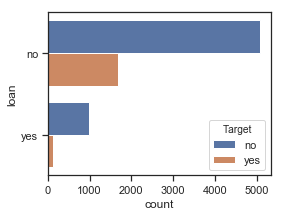

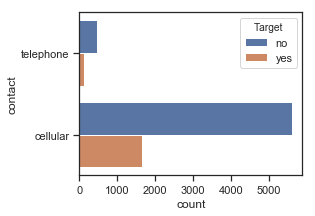

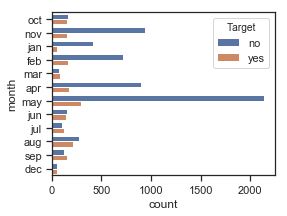

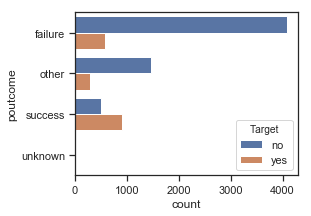

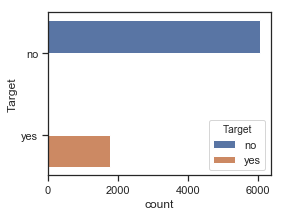

In [11]:
object_bol = df.dtypes =='object'

for x,t in enumerate(df.dtypes[object_bol].index):
    plt.figure(figsize=(4,3))
    
    sns.countplot(y=t, hue="Target",data=df)  

[Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'management'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'student')]

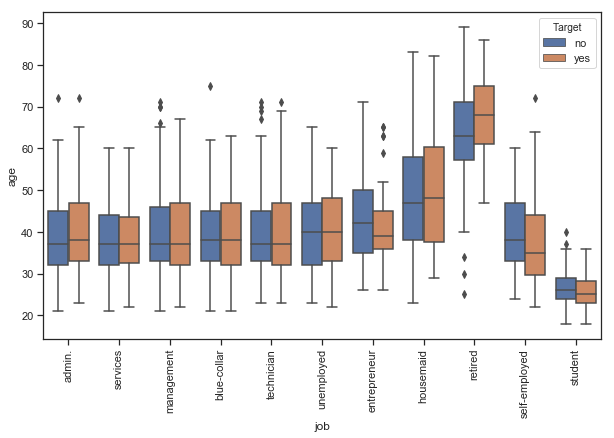

In [12]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='age', x='job', hue='Target',data=df)
ax.set_xticklabels(df["job"].unique(), rotation=90)

Text(0.5, 1.0, 'Amount of Balance by Term Suscriptions')

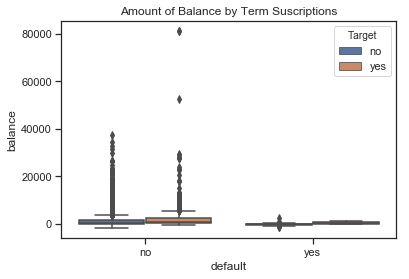

In [13]:
g = sns.boxplot(x="default", y="balance", hue="Target", data=df)
g.set_title("Amount of Balance by Term Suscriptions")

- Observed that when default is no and Target is no, there are lots of outliers 

Text(0.5, 1.0, 'Type of Work by Term Suscriptions')

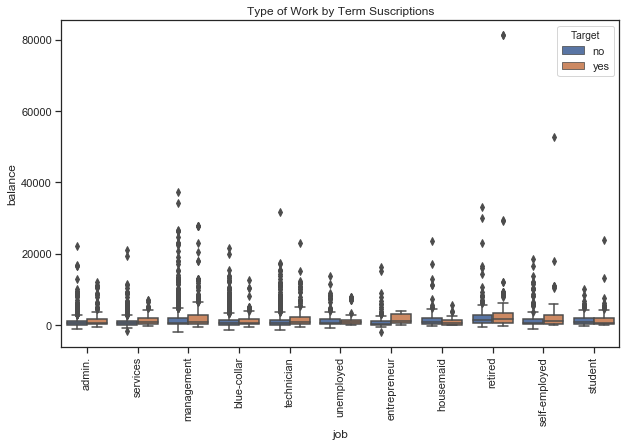

In [14]:
plt.figure(figsize=(10,6))
g1 = sns.boxplot(x="job", y="balance", hue="Target", data=df)

g1.set_xticklabels(df["job"].unique(), rotation=90)
g1.set_title("Type of Work by Term Suscriptions")

D:\Tool\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Balance by Education')

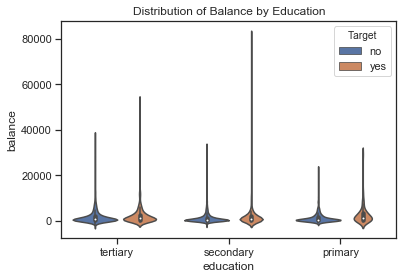

In [15]:
g2 = sns.violinplot(data=df, x="education", y="balance", hue="Target")
g2.set_title("Distribution of Balance by Education")

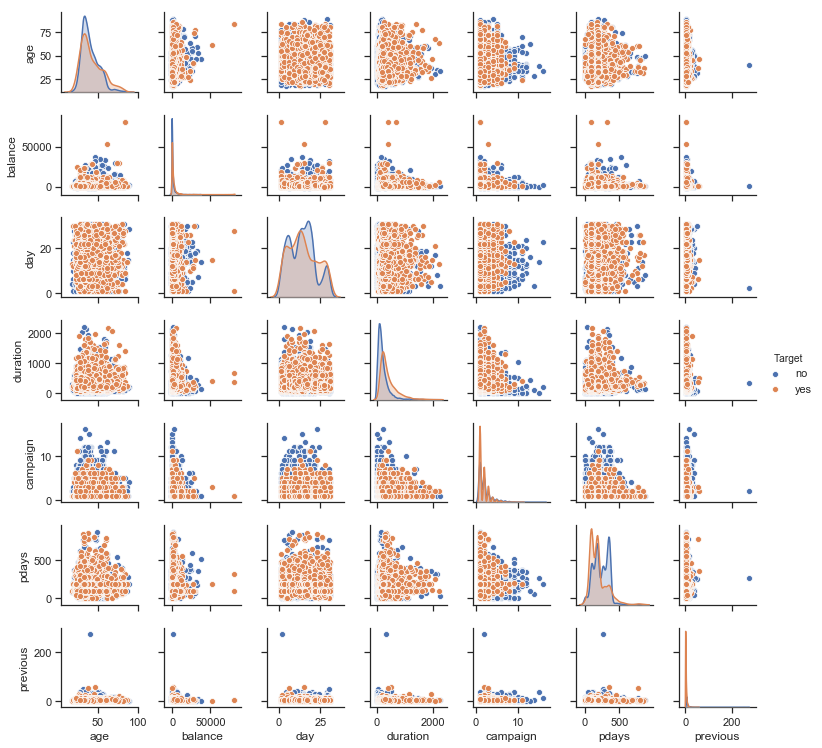

In [16]:
sns.pairplot(df, hue='Target', height=1.5)

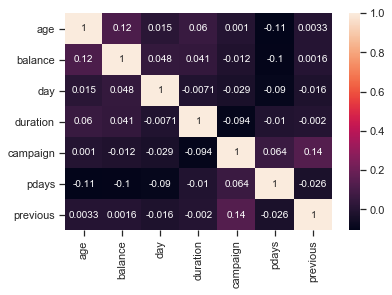

In [17]:
sns.heatmap(df.corr(method='pearson'), annot=True)

- Observed that pdays amd previous is highly correlated

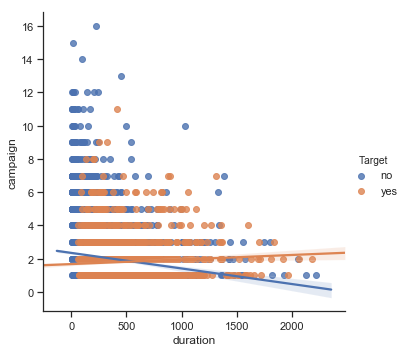

In [18]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,hue = 'Target')

plt.show()

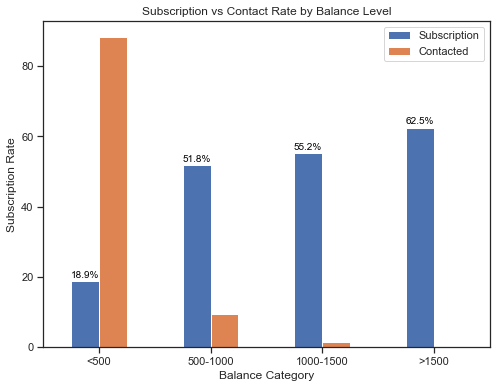

In [19]:
df.loc[df["duration"] < 500,  'duration_group'] = '<500'
df.loc[(df["duration"] >= 500) & (df["duration"] <= 1000), 'duration_group'] =  '500-1000'
df.loc[(df["duration"] >= 1000) & (df["duration"] <= 1500), 'duration_group'] = '1000-1500'
df.loc[(df["duration"] > 1500) , 'duration_group'] = '>1500'
df= df.drop(['duration'],axis=1)


count_duration_response_pct = pd.crosstab(df['Target'],df['duration_group']).apply(lambda x: x/x.sum() * 100)
count_duration_response_pct = count_duration_response_pct.T

dur = pd.DataFrame(df['duration_group'].value_counts())
dur['Contacted'] = dur['duration_group']*100/dur['duration_group'].sum()
dur['Subscription'] = count_duration_response_pct['yes']
dur.drop('duration_group',axis = 1,inplace = True)

#bal['bal'] = [1,2,0,4,3]
#bal = bal.sort_values('bal',ascending = True)

plot_balance = dur[['Subscription','Contacted']].plot(kind = 'bar',figsize = (8,6))

plot_balance.set_title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      dur['Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

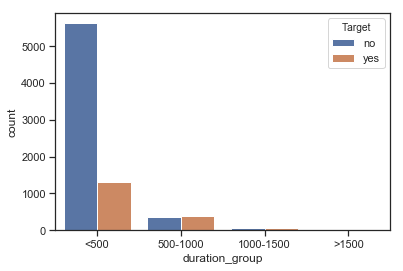

In [20]:
sns.countplot(x="duration_group",hue="Target", data=df)

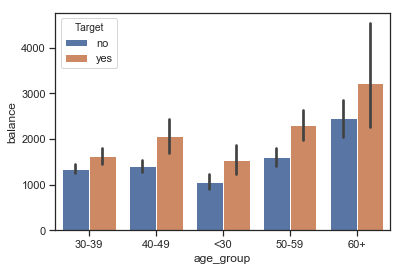

In [21]:
df.loc[df["age"] < 30,  'age_group'] = '<30'
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age_group'] =  '30-39'
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age_group'] = '40-49'
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age_group'] = '50-59'
df.loc[df["age"] >= 60, 'age_group'] = '60+'
df= df.drop(['age'],axis=1)
#df['age'] = [30,40,50,20,60]
#df = age.sort_values('age',ascending = True)

sns.barplot(x="age_group", y="balance",hue="Target", data=df)
#plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

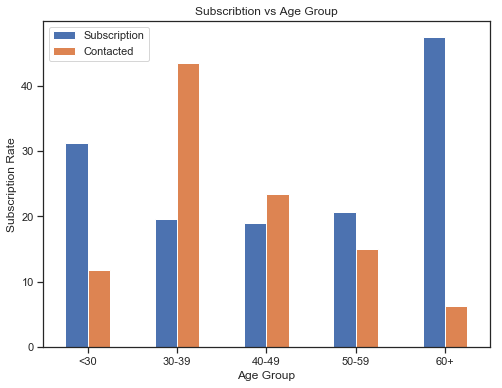

In [22]:
import matplotlib.pyplot as plt

count_age_response_pct = pd.crosstab(df['Target'],df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.T
age = pd.DataFrame(df['age_group'].value_counts())
age['Contacted'] = age['age_group']*100/age['age_group'].sum()
age['Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['Subscription','Contacted']].plot(kind = 'bar',
                                              figsize=(8,6))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plot_age.set_title("Subscribtion vs Age Group")
plt.show()

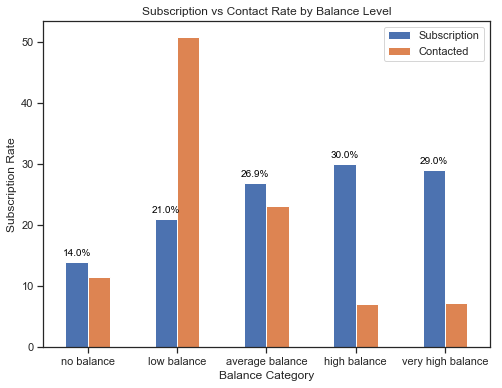

In [23]:
df.loc[df["balance"] <= 0,  'balance_group'] = 'no balance'
df.loc[(df["balance"] > 0) & (df["balance"] <= 1000), 'balance_group'] = 'low balance'
df.loc[(df["balance"] > 1000) & (df["balance"] <= 3000), 'balance_group'] = 'average balance'
df.loc[(df["balance"] > 3000) & (df["balance"] <= 5000), 'balance_group'] = 'high balance'
df.loc[(df["balance"] > 5000), 'balance_group'] = 'very high balance'
df= df.drop(['balance'],axis=1)
count_balance_response_pct = pd.crosstab(df['Target'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.T

bal = pd.DataFrame(df['balance_group'].value_counts())
bal['Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,4,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['Subscription','Contacted']].plot(kind = 'bar',figsize = (8,6))

plot_balance.set_title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

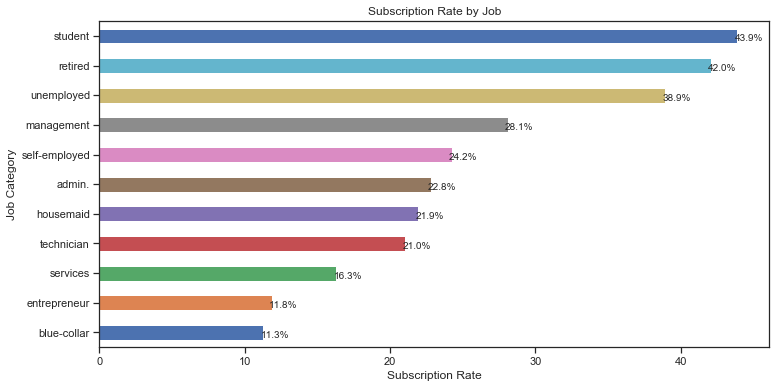

In [24]:
count_job_response_pct = pd.crosstab(df['Target'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plot_job.set_title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [25]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

y = df['Target']
df = df.drop(['Target'], axis=1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

X = df



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=100)
X_train[0:5]

,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,duration_group_<500,duration_group_>1500,age_group_40-49,age_group_50-59,age_group_60+,age_group_<30,balance_group_high balance,balance_group_low balance,balance_group_no balance,balance_group_very high balance
36243,11,2,174,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
29398,2,3,269,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
43188,2,2,203,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
30985,9,4,193,7,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
43040,15,3,186,2,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


              precision    recall  f1-score   support

          no       0.89      0.80      0.85      1819
         yes       0.50      0.68      0.58       536

   micro avg       0.77      0.77      0.77      2355
   macro avg       0.70      0.74      0.71      2355
weighted avg       0.81      0.77      0.78      2355



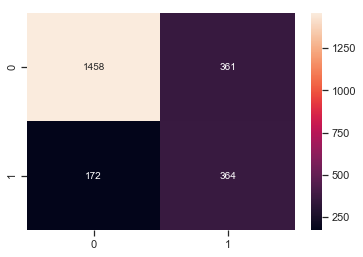

In [27]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

y_pred = naive_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

naive_score = naive_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
#print('Precision Score: ', precision_score(y_test, pred_naive))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
#print('Recall Score: ', recall_average)

#pred_naive.shape
#y_test.shape

              precision    recall  f1-score   support

          no       0.85      0.93      0.89      1819
         yes       0.67      0.46      0.54       536

   micro avg       0.83      0.83      0.83      2355
   macro avg       0.76      0.70      0.72      2355
weighted avg       0.81      0.83      0.81      2355



0.8254777070063695

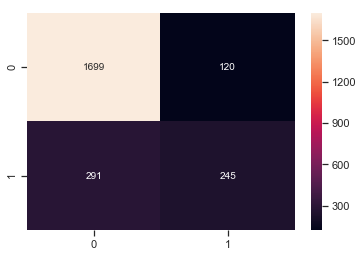

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# Fit the model on train
logistic_reg_model = LogisticRegression(solver='liblinear')
logistic_reg_model.fit(X_train, y_train)

y_pred = logistic_reg_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

logistic_reg_score = logistic_reg_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
logistic_reg_score

              precision    recall  f1-score   support

          no       0.82      0.95      0.88      1819
         yes       0.62      0.30      0.41       536

   micro avg       0.80      0.80      0.80      2355
   macro avg       0.72      0.62      0.64      2355
weighted avg       0.78      0.80      0.77      2355



0.7991507430997877

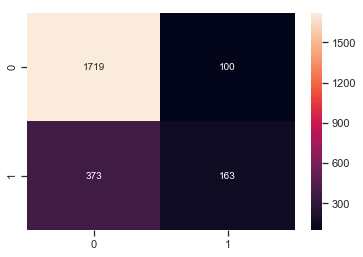

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors= 30 , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

knn_score = knn_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
knn_score

              precision    recall  f1-score   support

          no       0.87      0.90      0.89      1819
         yes       0.62      0.54      0.58       536

   micro avg       0.82      0.82      0.82      2355
   macro avg       0.75      0.72      0.73      2355
weighted avg       0.81      0.82      0.82      2355



0.8208067940552017

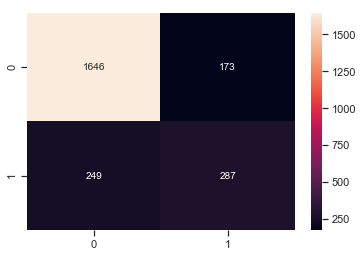

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=5, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

dt_score = dt_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
dt_score

In [36]:
## Calculating feature importance

feat_importance = dt_model.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(X.columns, dt_model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome_success,0.505935
duration_group_<500,0.176276
housing_yes,0.137899
pdays,0.124082
month_may,0.013661
loan_yes,0.012865
month_sep,0.009521
education_secondary,0.005573
job_services,0.002894
job_management,0.002739


              precision    recall  f1-score   support

          no       0.86      0.92      0.89      1819
         yes       0.65      0.49      0.56       536

   micro avg       0.82      0.82      0.82      2355
   macro avg       0.76      0.70      0.72      2355
weighted avg       0.81      0.82      0.81      2355



0.8237791932059448

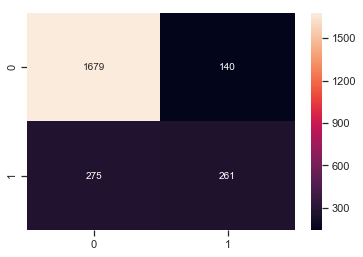

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators = 50, random_state = 1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

rf_score = rf_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
rf_score

              precision    recall  f1-score   support

          no       0.85      0.94      0.89      1819
         yes       0.68      0.43      0.52       536

   micro avg       0.82      0.82      0.82      2355
   macro avg       0.77      0.68      0.71      2355
weighted avg       0.81      0.82      0.81      2355



0.8246284501061572

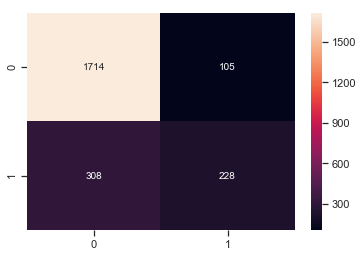

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
ab_model.fit(X_train, y_train)

y_pred = ab_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='d')

ab_score = ab_model.score(X_test, y_test)

from sklearn.metrics import  classification_report
print (classification_report(y_test, y_pred))
ab_score